In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten

import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense,LSTM, Masking, Dropout
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation,Flatten

# load data

In [3]:
df1_ori=pd.read_csv('BBB_planB_monthly.csv', low_memory = False)

In [4]:
df1_ori

,T0_Act1,T0_Act12,T0_Act13,T0_Act14,T0_Act19,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,...,T9_Act19,T9_Act2,T9_Act3,T9_Act4,T9_Act5,T9_Act6,T9_Act7,T9_Act9,id,final_result
0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_23629,0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_25107,1
2,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_29144,0
3,119.0,0.0,2.0,3.0,0.0,1.0,44.0,103.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_31663,1
4,7.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_34229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2688945,1
5337,66.0,0.0,0.0,1.0,0.0,26.0,4.0,33.0,0.0,8.0,...,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,BBB_2014J_2692969,1
5338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2694919,1
5339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2014J_2698577,0


In [6]:
df1_sorted=df1_ori.sort_values(by=['id'])
df1_sorted.head(10)

,T0_Act1,T0_Act12,T0_Act13,T0_Act14,T0_Act19,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,...,T9_Act19,T9_Act2,T9_Act3,T9_Act4,T9_Act5,T9_Act6,T9_Act7,T9_Act9,id,final_result
1093,32.0,0.0,1.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_1008675,1
31,3.0,0.0,0.0,2.0,0.0,1.0,7.0,17.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_104054,1
32,165.0,0.0,9.0,3.0,0.0,2.0,17.0,71.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_108377,1
33,29.0,0.0,0.0,0.0,0.0,3.0,11.0,11.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_108589,1
1094,0.0,0.0,0.0,0.0,0.0,3.0,3.0,8.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_1098728,0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_109938,1
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_110881,1
36,67.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_116603,1
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_117071,0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_120994,0


In [7]:
df1_sorted.info() # final_result  is an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5341 entries, 1093 to 3839
Columns: 122 entries, T0_Act1 to final_result
dtypes: float64(120), int64(1), object(1)
memory usage: 5.0+ MB


# prepare dataset for y

In [8]:
y = df1_sorted['final_result']

# prepare dataset for X

In [9]:
X=df1_sorted.drop(['final_result','id'], axis=1)

In [10]:
X.shape

(5341, 120)

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled.shape

(5341, 120)

In [12]:
X=X_scaled.reshape(X_scaled.shape[0],1,120)
X.shape

(5341, 1, 120)

In [13]:
from sklearn.model_selection import KFold
X = np.array(X)
y = np.array(y)
kf = KFold(n_splits=10,shuffle=True, random_state=42)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=10, random_state=42, shuffle=True)
TRAIN: [   0    1    2 ... 5337 5339 5340] TEST: [   8   15   23   29   33   65   79   80   84   88  106  107  132  144
  151  157  167  168  179  199  227  228  230  239  240  245  248  251
  254  272  279  290  292  296  297  315  333  346  351  373  393  401
  410  416  418  422  426  439  443  465  468  471  472  485  486  491
  497  501  505  530  534  538  544  553  555  577  584  589  599  624
  625  626  642  653  655  683  691  696  705  721  724  734  742  746
  748  751  763  776  787  794  798  803  807  810  811  812  829  838
  848  881  898  907  911  915  926  957  964  969  977  994  996 1020
 1025 1032 1038 1044 1049 1073 1084 1086 1094 1103 1126 1128 1158 1163
 1168 1173 1188 1194 1197 1209 1215 1220 1223 1281 1292 1302 1319 1322
 1330 1344 1351 1360 1397 1406 1411 1412 1421 1438 1468 1471 1476 1477
 1480 1487 1504 1526 1533 1553 1557 1561 1580 1612 1615 1618 1620 1623
 1652 1658 1665 1666 1669 1672 1705 1743 1744 174

# build LSTM model

In [14]:
cvscores_accuracy = []
cvscores_fscore = []
cvscores_auc = []

for train_index, test_index in kf.split(X):
    cvscores_fscore_temp = 0
    print("\nRunning a new one...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('\n # of train:{}; # of test:{}; total #:{}'.format(len(X_train), len(X_test), len(X_train)+len(X_test)))
    
    lr=0.0001
    epochs = 500
    model = Sequential()
    model.add(LSTM(32, dropout=0.2, input_shape=(X_train.shape[1], X_train.shape[2]),
                   return_sequences=True))
    model.add(LSTM(16, dropout=0.2, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
                  metrics=['accuracy','Recall','Precision', 'AUC'])
    print(model.summary())
    history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=0)
    scores = model.evaluate(X_test, y_test)
    cvscores_fscore_temp = (2*scores[2]*scores[3])/(scores[2]+scores[3])
    print(scores[1])
    print(cvscores_fscore_temp)
    print(scores[4])

    cvscores_accuracy.append(scores[1] * 100)
    cvscores_fscore.append(cvscores_fscore_temp * 100)
    cvscores_auc.append(scores[4] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy), np.std(cvscores_accuracy)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_fscore), np.std(cvscores_fscore)))
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_auc), np.std(cvscores_auc)))


Running a new one...

 # of train:4806; # of test:535; total #:5341
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             19584     
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 22,737
Trainable params: 22,737
Non-trainable params: 0
_________________________________________________________________
None
17/17 [==============================] - 0s 5ms/step - loss: 0.3079 - accuracy: 0.8860 - recall: 0.9742 - precision: 0.8808 - auc: 0.9061
0.8859813213348389
0.9251533766653229
0.906103789806366

Running a new one...

 # of train:4807; # of te

17/17 [==============================] - 0s 5ms/step - loss: 0.3100 - accuracy: 0.8801 - recall: 0.9676 - precision: 0.8732 - auc: 0.9117
0.8801498413085938
0.9179487168828098
0.9116925001144409

Running a new one...

 # of train:4807; # of test:534; total #:5341
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 32)             19584     
                                                                 
 lstm_17 (LSTM)              (None, 16)                3136      
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 22,737
Trainable params: 22,737
Non-trainable params: 0
_________________________________________________________________
None
17/17 [==============================] - 0s 4

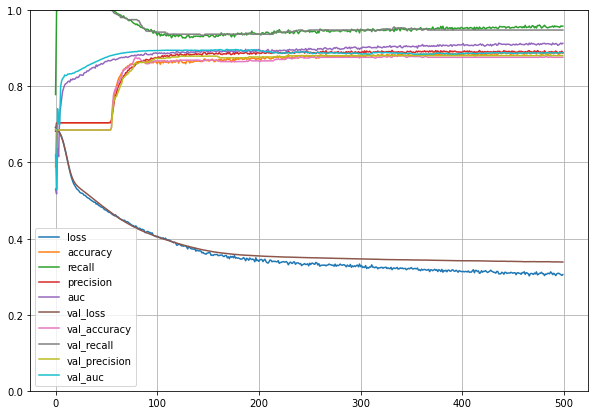

In [15]:
import matplotlib.pyplot as plt

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()